# Logistic Regression

Types of machine learning tasks:

|             |continuous           | categorical    |
|-----------  | --------------      | ----------     |
|**supervised**   | regression          | **classification** |
|**unsupervised** | dimensionality reduction | clustering     |

When the target variable takes only 2 values, we have binary classification. Otherwise, we have multiclass classification.

The first thing to say is that logistic regression is not a regression, but a classification learning algorithm. The name comes from statistics and is due to the fact that the mathematical formulation of logistic regression is similar to that of linear regression. In fact the only difference is that the polynomial gets passed through the `sigmoid` function, i.e. the formula that produces the output of the model is (the so-called `forward pass`):

$$result = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n)}}$$

Note that:

$$\frac{1}{1 + e^{-x}} = \frac{e^x}{1 + e^x}$$

When we have classification we won't be using `MSE` or `RMSE` - instead we'll use `binary crossentropy`:

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\ln(h_\theta(x^{i}))+(1-y^{i})\ln(1-h_\theta(x^{i}))$$

where

- $J$ - name of the function that calculates the loss;
- $\theta$ - identifier for the model, i.e. the parameters of the model;
- $m$ - number of observations;
- $y^i$ - ground truth label;
- $h_\theta(x^{i})$ - prediction of the model for observation $x^{i}$, i.e. $h_\theta(x^{i}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x^{i}_1 + \beta_2x^{i}_2 + ... + \beta_nx^{i}_n)}}$. Note that this is a probability;

Vectorized (i.e. in terms of matrix/array operations) the loss looks like this:

$$J(\theta)=\frac{1}{m} \cdot (-y^{T}\ln(h) - (1-y)^{T}\ln(1 - h))$$

Notice because $y$ can be only $0$ or $1$ only one of the two summed elements will have a positive value (the other one will be $0$), thus we're essentially summing up probabilities.

At first glance, the function looks complex but when visualized it is rather straightforward:

<img src="https://ml-explained.com/_ipx/sizes_xs:320px%20md:768px%20lg:1024px,w_1536,f_webp/articles/logistic-regression-explained/loss_functions.png">

The above graph shows that the further away the prediction is from the actual $y$ value the bigger the loss gets:
- If the correct answer is $0$, then the cost function will be $0$ if the prediction is also $0$. If the prediction approaches $1$, then the cost function will approach $\infty$.
- If the correct answer is $1$, then the cost function will be $0$ if the prediction is also $1$. If the prediction approaches $0$, then the cost function will approach $\infty$.

The derivative of the sigmoid function is:

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/derivative_sigmoid.png">

Having this in mind the derivative of binary crossentropy with respect to the weights of a model can be derived as follows:

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/derivative_logistic_regression.png">

The derivative with respect to the bias of the model is:

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{i}) - y^{i}]$

Vectorized they look like this:

- Parameters:

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{i}) - y^{i}]x_{i} = \frac{1}{m} \cdot x^{T} (h - y)$

- Bias:

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{i}) - y^{i}] = \frac{1}{m} \cdot (h - y)$

Logistic regression can also be used for multiclass classification - `sklearn` has built-in functionality for that. Check it out [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

## Imports

In [366]:
%reset -f

In [367]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

## Load data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted.

**Is it possible to build a model that would predict someone's likelihood to hear the high frequency sound based solely on their features (age and physical score)?**

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [368]:
df = pd.read_csv('https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/DATA/hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


## Exploratory data analysis

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [370]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [371]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

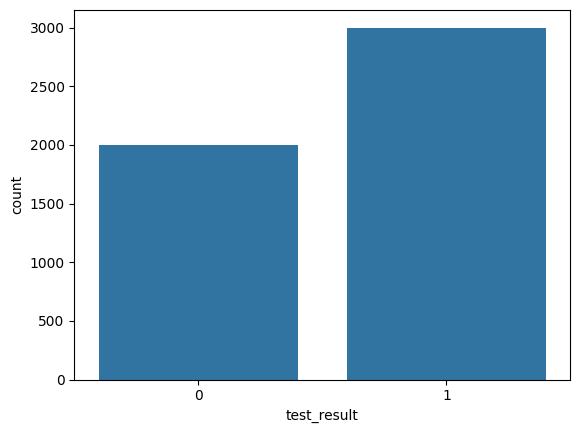

In [372]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

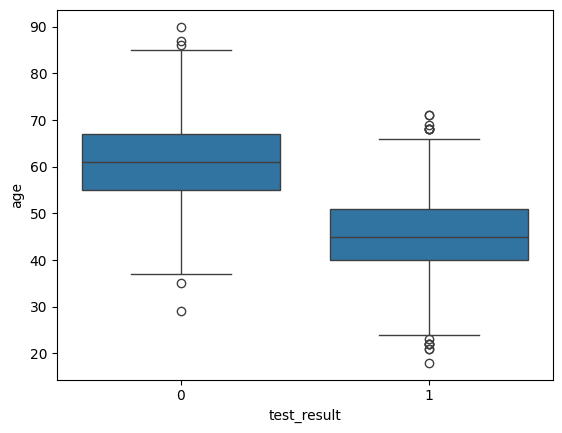

In [373]:
sns.boxplot(x='test_result',y='age',data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

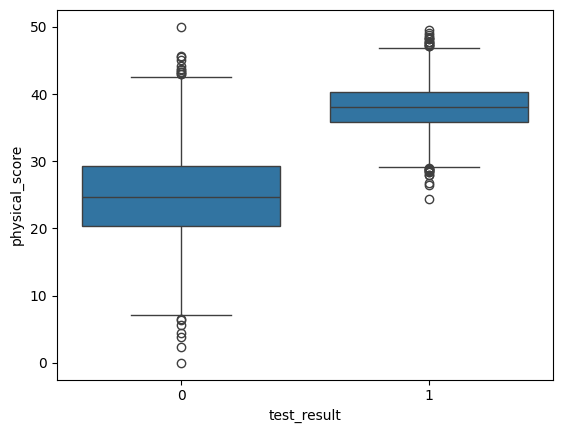

In [374]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<Axes: xlabel='age', ylabel='physical_score'>

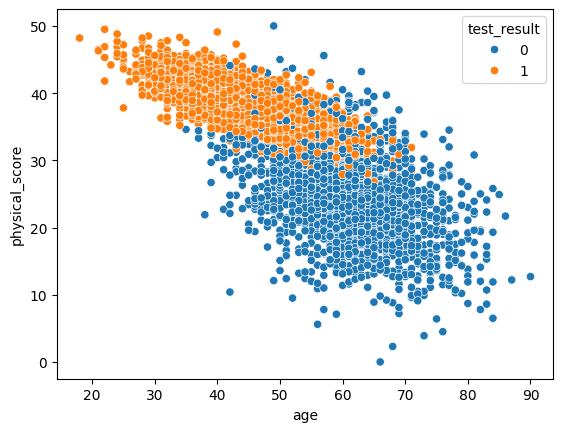

In [375]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

/home/work/Dev/private-ml/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


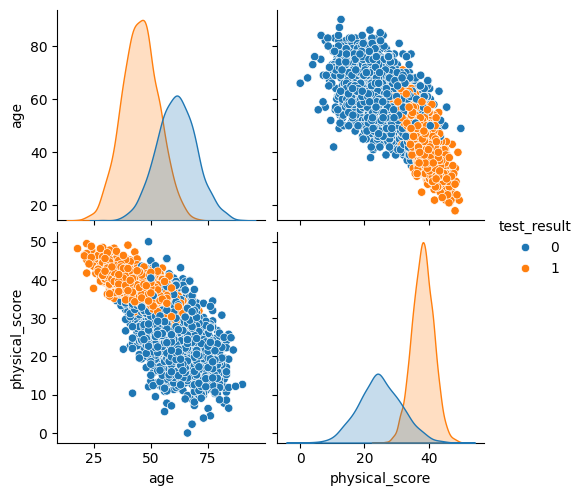

In [376]:
sns.pairplot(df,hue='test_result')

<Axes: >

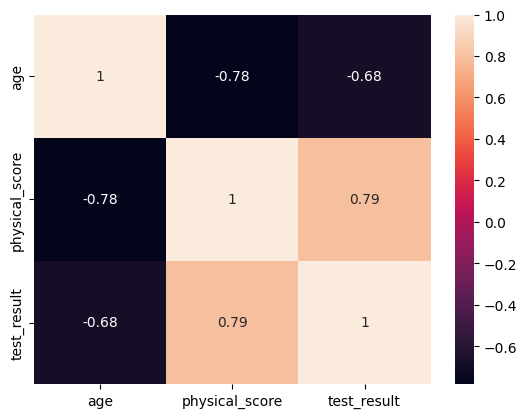

In [377]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

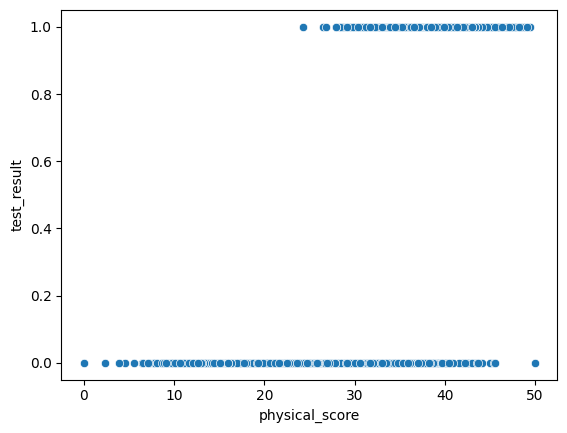

In [378]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<Axes: xlabel='age', ylabel='test_result'>

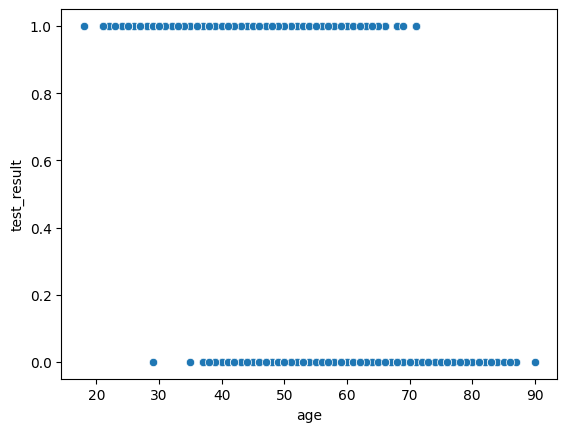

In [379]:
sns.scatterplot(x='age',y='test_result',data=df)

## Data preparation

In [380]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [381]:
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [382]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
print(f'{X_train.shape=}')
print(f'{X_test.shape=}')
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(4500, 2)
X_test.shape=(500, 2)
y_train.shape=(4500,)
y_test.shape=(500,)


In [384]:
scaler = StandardScaler()
scaler

StandardScaler()

In [385]:
X_train

,age,physical_score
141,32.0,43.0
4755,62.0,27.7
4886,40.0,49.1
2304,67.0,27.3
2727,53.0,35.3
...,...,...
4171,71.0,16.4
599,54.0,35.7
1361,65.0,21.2
1547,83.0,24.1


In [386]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[-1.75380782,  1.25931551],
       [ 0.91476804, -0.61814349],
       [-1.04218759,  2.00784491],
       ...,
       [ 1.18162562, -1.41575679],
       [ 2.78277114, -1.05989855],
       [-1.93171288,  1.17341869]])

In [387]:
X_test

,age,physical_score
1718,39.0,37.8
2511,45.0,38.7
345,56.0,21.8
2521,40.0,44.0
54,64.0,25.4
...,...,...
4770,46.0,37.7
188,59.0,36.5
3335,54.0,22.8
4583,58.0,20.5


In [388]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[-1.13114012,  0.62122487],
       [-0.59742495,  0.73166363],
       [ 0.38105287, -1.34213095],
       [-1.04218759,  1.38202525],
       [ 1.0926731 , -0.90037589],
       [ 0.11419528, -1.42802776],
       [-0.50847242,  0.44943123],
       [-1.13114012,  0.71939266],
       [ 1.27057815, -1.47711166],
       [-0.41951989,  0.71939266],
       [-0.15266231,  0.5107861 ],
       [-1.39799771,  0.80528948],
       [-1.39799771,  0.90345727],
       [-0.59742495, -1.07216952],
       [-2.10961794,  1.89740615],
       [-0.95323506,  0.36353442],
       [ 1.62638827, -0.99854368],
       [-1.57590277,  1.1243348 ],
       [-1.48695024,  1.61517375],
       [ 1.35953068, -1.40348582],
       [ 0.91476804, -0.4708918 ],
       [-0.06370978,  0.38807637],
       [ 1.00372057,  0.08130202],
       [-0.24161484,  0.75620558],
       [ 1.18162562,  0.30217955],
       [ 0.73686298,  0.01994715],
       [-0.77533001,  0.57214097],
       [-0.33056736,  0.90345727],
       [ 0.64791045,

## Logistic regression

Derivative of loss function with respect to the parameters: ???.

Use the vectorized mathematical formula:

$$J(\theta)=\frac{1}{m} \cdot (-y^{T}\ln(h) - (1-y)^{T}\ln(1 - h))$$

In [389]:
def binary_crossentropy(y_true, y_pred):
    return (1 / y_true.shape[0]) * (-y_true.T * np.log(y_pred) - (1 - y_true).T * np.log(1 - y_pred))

In [390]:
print(binary_crossentropy(np.array([1]), np.array([0.66])))
print(binary_crossentropy(np.array([1]), np.array([0.43])))
print(binary_crossentropy(np.array([0]), np.array([0.81])))

[0.41551544]
[0.84397007]
[1.66073121]


In [391]:
np.random.seed(42)
num_observations = 100
y_true = np.random.choice([0, 1], num_observations)
y_pred = np.random.rand(num_observations)
y_true

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [392]:
y_pred

array([0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
       0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033,
       0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
       0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694,
       0.77224477, 0.19871568, 0.00552212, 0.81546143, 0.70685734,
       0.72900717, 0.77127035, 0.07404465, 0.35846573, 0.11586906,
       0.86310343, 0.62329813, 0.33089802, 0.06355835, 0.31098232,
       0.32518332, 0.72960618, 0.63755747, 0.88721274, 0.47221493,
       0.11959425, 0.71324479, 0.76078505, 0.5612772 , 0.77096718,
       0.4937956 , 0.52273283, 0.42754102, 0.02541913, 0.10789143,
       0.03142919, 0.63641041, 0.31435598, 0.50857069, 0.90756647,
       0.24929223, 0.41038292, 0.75555114, 0.22879817, 0.07697991,
       0.28975145, 0.16122129, 0.92969765, 0.80812038, 0.63340376,
       0.87146059, 0.80367208, 0.18657006, 0.892559  , 0.53934224,
       0.80744016, 0.8960913 , 0.31800347, 0.11005192, 0.22793

In [393]:
binary_crossentropy(y_true, y_pred)

array([3.49280713e-02, 2.54720879e-03, 2.80509442e-02, 2.25215200e-02,
       9.11054412e-03, 8.13464693e-04, 9.26554590e-04, 2.18134695e-03,
       4.62819657e-04, 1.12291421e-02, 4.92130292e-03, 3.16560443e-03,
       1.76455787e-02, 4.41227000e-03, 1.26963370e-02, 7.82407083e-03,
       1.95953294e-02, 2.20401089e-03, 2.59627660e-02, 4.33414634e-02,
       2.58453721e-03, 2.21539441e-03, 5.19899396e-02, 2.04001156e-03,
       3.46926410e-03, 3.16071714e-03, 2.59716323e-03, 2.60308697e-02,
       1.02592222e-02, 2.15529452e-02, 1.98852957e-02, 9.76301192e-03,
       1.10594503e-02, 2.75579689e-02, 1.16801921e-02, 3.93314213e-03,
       3.15250372e-03, 1.01488936e-02, 2.18225191e-02, 6.39066133e-03,
       1.27372394e-03, 1.24912634e-02, 2.73404420e-03, 5.77540382e-03,
       2.60109474e-03, 7.05633620e-03, 6.48684788e-03, 5.57814194e-03,
       3.67225337e-02, 2.22662986e-02, 3.19336813e-04, 4.51911623e-03,
       3.77396709e-03, 6.76151054e-03, 2.38126553e-02, 1.38912946e-02,
      

In [394]:
y_pred = np.linspace(0, 1, 50)
y_pred

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [395]:
loss_if_y_is_0 = binary_crossentropy(np.array([0]), y_pred)
loss_if_y_is_0

/tmp/ipykernel_131786/4017609860.py:2: RuntimeWarning: divide by zero encountered in log
  return (1 / y_true.shape[0]) * (-y_true.T * np.log(y_pred) - (1 - y_true).T * np.log(1 - y_pred))
/tmp/ipykernel_131786/4017609860.py:2: RuntimeWarning: invalid value encountered in multiply
  return (1 / y_true.shape[0]) * (-y_true.T * np.log(y_pred) - (1 - y_true).T * np.log(1 - y_pred))


array([       nan, 0.02061929, 0.0416727 , 0.0631789 , 0.08515781,
       0.10763066, 0.13062018, 0.15415068, 0.17824823, 0.20294084,
       0.22825865, 0.25423414, 0.28090239, 0.30830136, 0.33647224,
       0.36545977, 0.39531274, 0.4260844 , 0.45783309, 0.49062292,
       0.52452447, 0.55961579, 0.59598343, 0.63372376, 0.67294447,
       0.71376647, 0.75632608, 0.80077784, 0.84729786, 0.89608802,
       0.94738132, 1.00144854, 1.05860695, 1.11923158, 1.1837701 ,
       1.25276297, 1.32687094, 1.40691365, 1.49392503, 1.58923521,
       1.69459572, 1.81237876, 1.94591015, 2.10006083, 2.28238239,
       2.50552594, 2.79320801, 3.19867312, 3.8918203 ,        inf])

In [396]:
loss_if_y_is_1 = binary_crossentropy(np.array([1]), y_pred)
loss_if_y_is_1

/tmp/ipykernel_131786/4017609860.py:2: RuntimeWarning: divide by zero encountered in log
  return (1 / y_true.shape[0]) * (-y_true.T * np.log(y_pred) - (1 - y_true).T * np.log(1 - y_pred))
/tmp/ipykernel_131786/4017609860.py:2: RuntimeWarning: invalid value encountered in multiply
  return (1 / y_true.shape[0]) * (-y_true.T * np.log(y_pred) - (1 - y_true).T * np.log(1 - y_pred))


array([       inf, 3.8918203 , 3.19867312, 2.79320801, 2.50552594,
       2.28238239, 2.10006083, 1.94591015, 1.81237876, 1.69459572,
       1.58923521, 1.49392503, 1.40691365, 1.32687094, 1.25276297,
       1.1837701 , 1.11923158, 1.05860695, 1.00144854, 0.94738132,
       0.89608802, 0.84729786, 0.80077784, 0.75632608, 0.71376647,
       0.67294447, 0.63372376, 0.59598343, 0.55961579, 0.52452447,
       0.49062292, 0.45783309, 0.4260844 , 0.39531274, 0.36545977,
       0.33647224, 0.30830136, 0.28090239, 0.25423414, 0.22825865,
       0.20294084, 0.17824823, 0.15415068, 0.13062018, 0.10763066,
       0.08515781, 0.0631789 , 0.0416727 , 0.02061929,        nan])

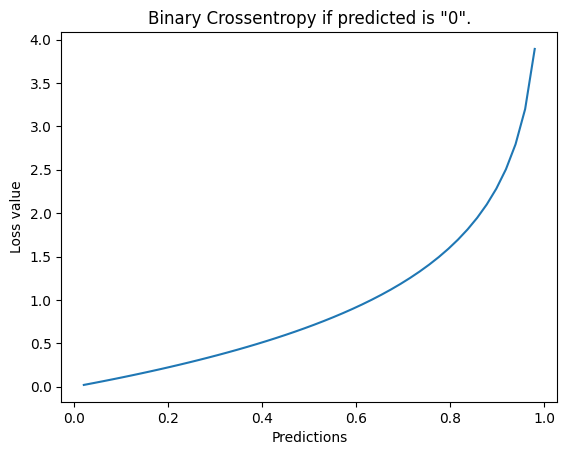

In [397]:
plt.title('Binary Crossentropy if predicted is "0".')
plt.xlabel('Predictions')
plt.ylabel('Loss value')
sns.lineplot(x=y_pred, y=loss_if_y_is_0);

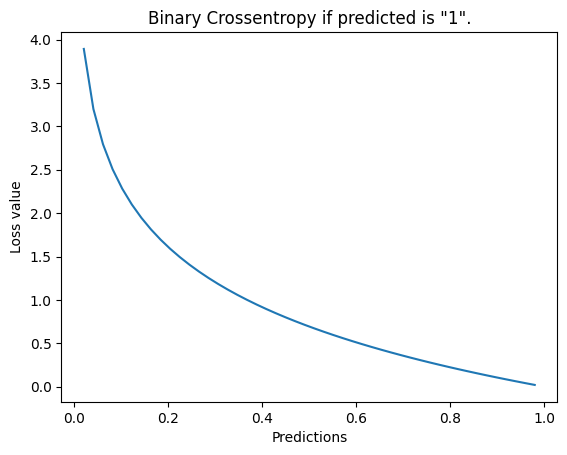

In [398]:
plt.title('Binary Crossentropy if predicted is "1".')
plt.xlabel('Predictions')
plt.ylabel('Loss value')
sns.lineplot(x=y_pred, y=loss_if_y_is_1);

Implement `Logistic_Regression`.

Use the following formulas for updating the weights on each iteration:

- The derivative with respect to the parameters of the model is:

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{i}) - y^{i}]x_{i} = \frac{1}{m} \cdot x^{T} (h - y)$

- The derivative with respect to the bias of the model is:

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{i}) - y^{i}] = \frac{1}{m} \cdot (h - y)$

In [399]:
class Logistic_Regression():
  def __init__(self, learning_rate, num_iterations):
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations

  def fit(self, X, Y):
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)
    self.b = 0

    self.X = X
    self.Y = Y

    for _ in range(self.num_iterations):
      self.update_weights()

  def update_weights(self):
    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
    db = (1/self.m)*np.sum(Y_hat - self.Y)

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, X):
    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

In [400]:
log_model_manual_no_scale = Logistic_Regression(learning_rate=0.001, num_iterations=100)
log_model_manual_no_scale.fit(X_train,y_train)
log_model_manual_no_scale.w, log_model_manual_no_scale.b

(array([-0.08591177,  0.15238174]), 0.0008299805579754756)

In [401]:
log_model_no_scale = LogisticRegression()
log_model_no_scale.fit(X_train,y_train)
log_model_no_scale.coef_

array([[-0.08365972,  0.43251827]])

In [402]:
log_model_manual = Logistic_Regression(learning_rate=0.001, num_iterations=100)
log_model_manual.fit(scaled_X_train,y_train)
log_model_manual.w, log_model_manual.b

(array([-0.03281972,  0.03798985]), 0.009723607231189662)

In [403]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)
log_model.coef_

array([[-0.94953524,  3.45991194]])

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

## Model performance

In [404]:
y_pred = log_model_manual_no_scale.predict(X_test)
accuracy_score(y_test,y_pred)

0.914

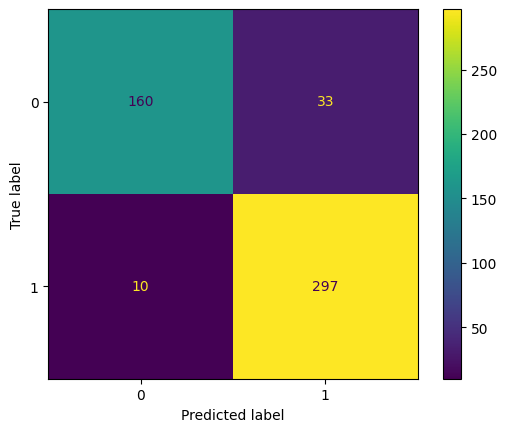

In [405]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [406]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       193
           1       0.90      0.97      0.93       307

    accuracy                           0.91       500
   macro avg       0.92      0.90      0.91       500
weighted avg       0.92      0.91      0.91       500



In [407]:
y_pred = log_model_no_scale.predict(X_test)
accuracy_score(y_test,y_pred)

0.93

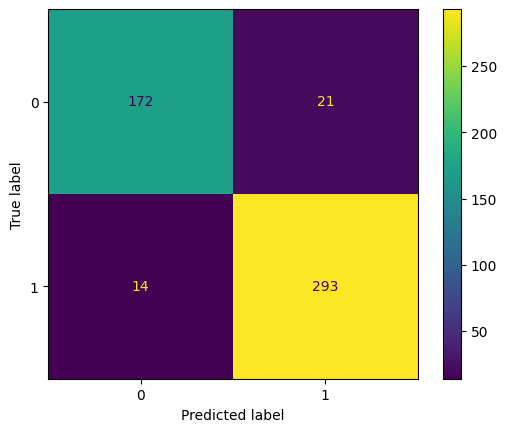

In [408]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [409]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [410]:
y_pred = log_model_manual.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.906

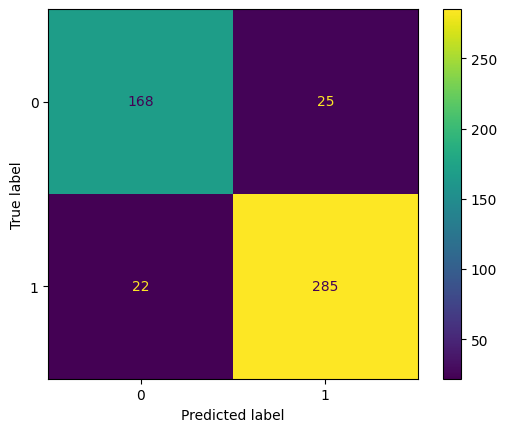

In [411]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [412]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       193
           1       0.92      0.93      0.92       307

    accuracy                           0.91       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.91      0.91      0.91       500



In [413]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.93

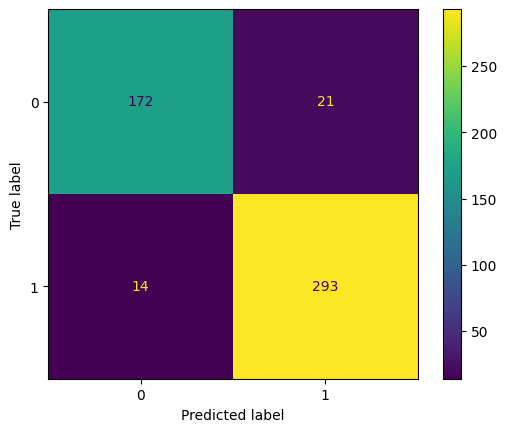

In [414]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [415]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



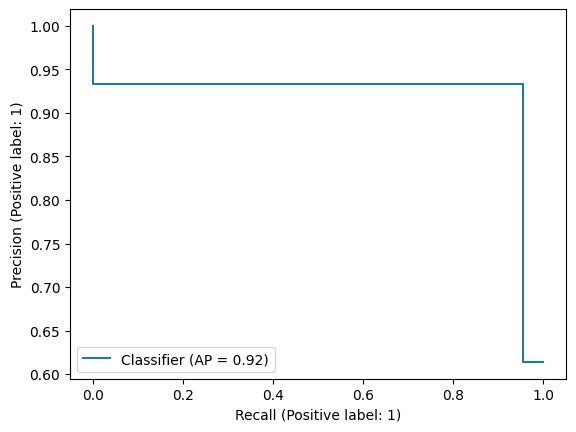

In [416]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.show()

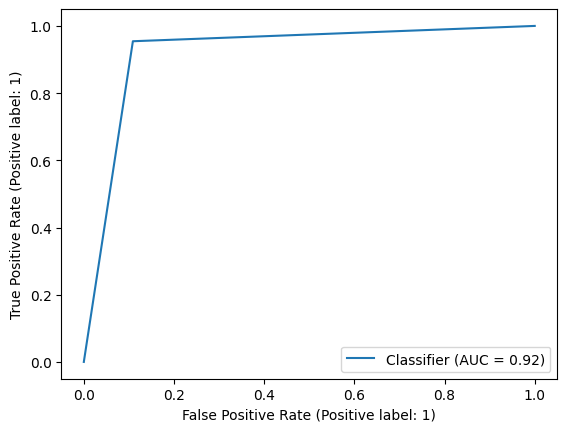

In [417]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()